## Visualize Sentiment Scores

Sentiment scores can be visualized in various ways. In this lecture, we will briefly mention how to use time series plots to visualize the trends of sentiment scores.

**"classdata/Airline-Tweet-Sentiment.csv"** collects the tweets that mention one of the six major airlines in the US. The goal here is to compare the sentiment of the tweets on these airlines during the time period of the collection.

In [1]:
import pandas as pd
df2 = pd.read_csv('classdata/Airline-Tweet-Sentiment.csv',encoding='latin-1')
df2[["tweet_created","airline","text"]]

,tweet_created,airline,text
0,2015-02-24 11:35:52,Virgin America,@VirginAmerica What @dhepburn said.
1,2015-02-24 11:15:59,Virgin America,@VirginAmerica plus you've added commercials t...
2,2015-02-24 11:15:48,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,2015-02-24 11:15:36,Virgin America,@VirginAmerica it's really aggressive to blast...
4,2015-02-24 11:14:45,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,2015-02-22 12:01:01,American,@AmericanAir thank you we got on a different f...
14636,2015-02-22 11:59:46,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,2015-02-22 11:59:15,American,@AmericanAir Please bring American Airlines to...
14638,2015-02-22 11:59:02,American,"@AmericanAir you have my money, you change my ..."


### Prepare the Data

To create a time series plot, time index is very important. Column "tweet_created" tells when each tweet was posted. However, it was loaded as a string column which cannot be used as time index in a plot directly. 

In [2]:
#Check the data type of a column
df2["tweet_created"].dtype

dtype('O')

**dtype('O')** means string type in python.

We first need to convert column "tweet_created" from string to "datetime" type using **pd.to_datetime**

In [3]:
df2["tweet_created"]=pd.to_datetime(df2["tweet_created"],format="%Y-%m-%d %H:%M:%S")

The key for converting the data type correctly is to set up the right format of the date and time. In this example, the format is "%Y-%m-%d %H:%M:%S". To understand the meaning of each component in a time format, see 
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [4]:
#Check the data type again
df2["tweet_created"].dtype

dtype('<M8[ns]')

**dtype('<M8[ns]')** means this column has been converted to "datetime" type.

We sort the tweets by airlines first and then by timestamp in an ascending order. We also reset the row index after sorting. 

In [5]:
df2.sort_values(by=["airline","tweet_created"],ascending=True,inplace=True)
df2.reset_index(drop=True,inplace=True)

Remove urls and @users in the tweets using **re** and regular expression.

In [6]:
import re
df2.text=[re.sub("http\S+", "", s) for s in df2.text]
df2.text=[re.sub("@\S+", "", s) for s in df2.text]

Generate sentiment scores for each tweet using all the three methods we learn.

In [7]:
from afinn import Afinn   
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

afinn = Afinn(emoticons=True) 
df2["AFINN"]=[afinn.score(s) for s in df2.text]

df2["TextBlob"]=[TextBlob(s).sentiment.polarity for s in df2.text]

analyzer=SentimentIntensityAnalyzer()
df2["VADER"]=[analyzer.polarity_scores(s)['compound'] for s in df2.text]

df2[["text","VADER","TextBlob","AFINN"]]

,text,VADER,TextBlob,AFINN
0,"Okay, I think 1565 has waited long enough for...",0.2263,0.150000,0.0
1,Hopefully you ll see bad ones as opportunity ...,0.8598,0.225000,8.0
2,- how long does it take to get credit to my A...,0.4588,-0.025000,-1.0
3,you need to work harder on the disconnect bet...,0.0000,-0.100000,0.0
4,we have 8 ppl so we need 2 know how many seat...,0.0772,0.166667,0.0
...,...,...,...,...
14635,and it's a really big bad thing about it,-0.5829,-0.350000,-2.0
14636,"it's really aggressive to blast obnoxious ""en...",-0.2716,0.006250,-5.0
14637,I didn't today... Must mean I need to take an...,0.0000,-0.390625,0.0
14638,plus you've added commercials to the experien...,0.0000,0.000000,0.0


## Time Series Plot

In [8]:
import matplotlib.pyplot as plt                      # a library for visualization
# inline display of plots
%matplotlib inline

We first plot the sentiment score of United Airline as a time series. To do so, we first create a temporary data frame called **dftemp** that only contains the rows for "United".

In [9]:
dftemp=df2[df2.airline=="United"]

Then we are ready to plot. We take "TextBlob" score as an example. Other scores can be visualized similarly.

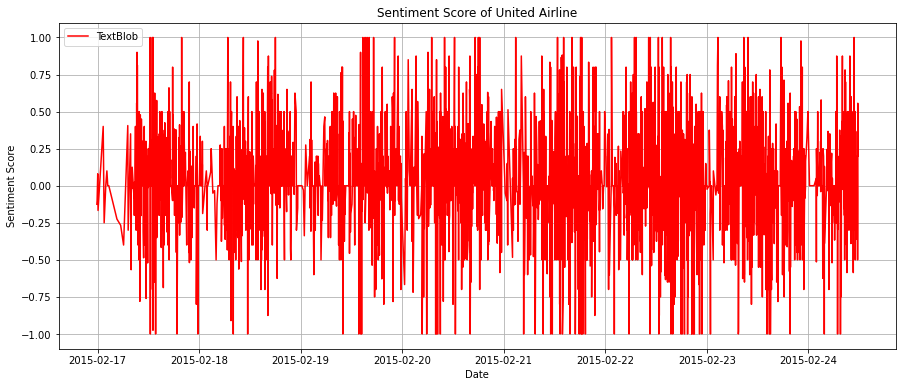

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(dftemp.tweet_created, dftemp.TextBlob, "-r", label="TextBlob")
plt.legend(loc="upper left")
plt.title("Sentiment Score of United Airline")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.grid(axis='both')
plt.show()

The original time series plot is very noisy and not readable. 

We must **"smooth"** the time series using moving average. A larger window size in moving average will lead to a more smooth curve. 

In the following, we use **.rolling(window=100).mean()** to generate the moving average for each sentiment score with a window size of 100.

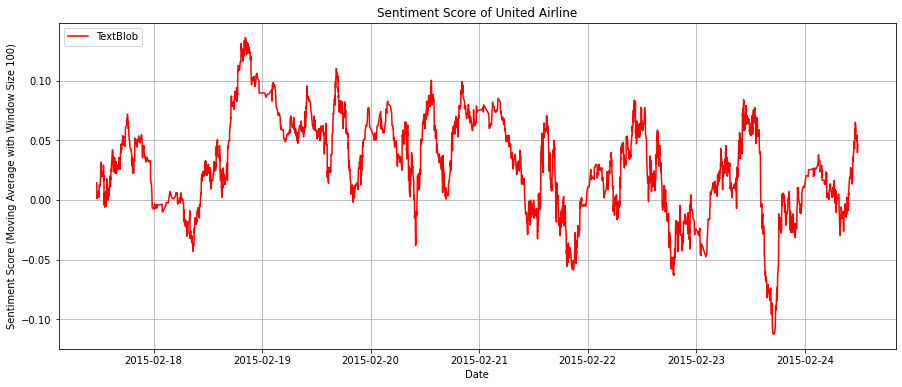

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(dftemp.tweet_created, dftemp.TextBlob.rolling(window=100).mean(), "-r", label="TextBlob")

plt.legend(loc="upper left")
plt.title("Sentiment Score of United Airline")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 100)")
plt.grid(axis='both')
plt.show()

The curves become less noisy and more readable after taking moving average. 

We next create a similar time series plot where we compare the VADER sentiment scores of three different airlines.

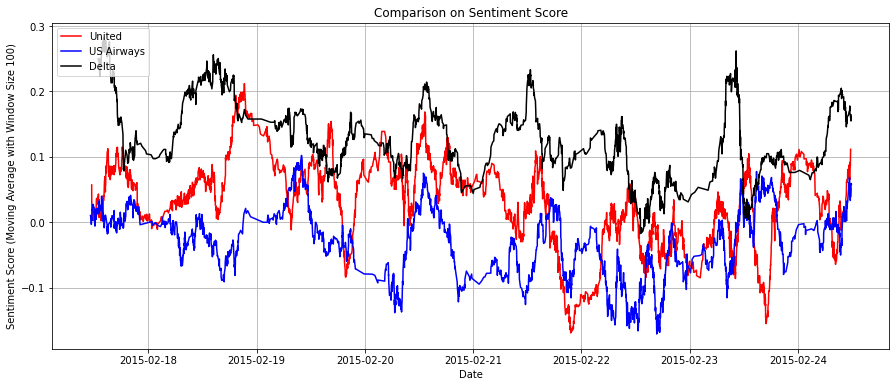

In [12]:
plt.figure(figsize=(15, 6))

dftemp=df2[df2.airline=="United"]
plt.plot(dftemp.tweet_created, dftemp.VADER.rolling(window=100).mean(), "-r", label="United")
dftemp=df2[df2.airline=="US Airways"]
plt.plot(dftemp.tweet_created, dftemp.VADER.rolling(window=100).mean(), "-b", label="US Airways")
dftemp=df2[df2.airline=="Delta"]
plt.plot(dftemp.tweet_created, dftemp.VADER.rolling(window=100).mean(), "-k", label="Delta")


plt.legend(loc="upper left")
plt.title("Comparison on Sentiment Score")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 100)")
plt.grid(axis='both')
plt.show()

According to the plot, Delta Airline has relatively better public image than the other two during that period.